# Descripción

La compañía de seguros Sure Tomorrow quiere resolver varias tareas con la ayuda de machine learning:

- Objetivo 1: encontrar clientes que sean similares a un cliente determinado. Esto ayudará a los agentes de la compañía con el marketing.
- Objetivo 2: predecir la probabilidad de que un nuevo cliente reciba una prestación del seguro. ¿Puede un modelo de predictivo funcionar mejor que un modelo dummy?
- Objetivo 3: proteger los datos personales de los clientes sin afectar al modelo del ejercicio anterior. Es necesario desarrollar un algoritmo de transformación de datos que dificulte la recuperación de la información personal si los datos caen en manos equivocadas. Esto se denomina enmascaramiento u ofuscación de datos. Pero los datos deben protegerse de tal manera que no se vea afectada la calidad de los modelos de machine learning. No es necesario elegir el mejor modelo, basta con demostrar que el algoritmo funciona correctamente.


# Preprocesamiento y exploración de datos

## Inicialización

In [1]:
#pip install scikit-learn --upgrade

In [2]:
import numpy as np
import matplotlib.pyplot as plt 
import math
import pandas as pd

import seaborn as sns

import sklearn.linear_model
import sklearn.metrics
import sklearn.neighbors
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from itertools import product

from sklearn.preprocessing import MaxAbsScaler

from sklearn.model_selection import train_test_split

from IPython.display import display

## Carga de datos

Carga los datos y haz una revisión básica para comprobar que no hay problemas obvios.

In [3]:
df = pd.read_csv('/datasets/insurance_us.csv')

Renombramos las columnas para que el código se vea más coherente con su estilo.

In [4]:
df = df.rename(columns={'Gender': 'gender', 'Age': 'age', 'Salary': 'income', 'Family members': 'family_members', 'Insurance benefits': 'insurance_benefits'})

In [5]:
df.sample(40)

,gender,age,income,family_members,insurance_benefits
4874,0,30.0,42500.0,0,0
329,0,42.0,39500.0,2,0
2013,1,28.0,49200.0,0,0
3340,1,27.0,20400.0,4,0
2444,1,34.0,34800.0,1,0
1109,1,29.0,28900.0,0,0
1256,0,31.0,57000.0,0,0
466,0,33.0,25700.0,3,0
1598,0,28.0,39800.0,1,0
3020,0,40.0,45900.0,0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              5000 non-null   int64  
 1   age                 5000 non-null   float64
 2   income              5000 non-null   float64
 3   family_members      5000 non-null   int64  
 4   insurance_benefits  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [7]:
# puede que queramos cambiar el tipo de edad (de float a int) aunque esto no es crucial

df['age'] = df['age'].astype(int)# escribe tu conversión aquí si lo deseas:

In [8]:
df.info()# comprueba que la conversión se haya realizado con éxito

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              5000 non-null   int64  
 1   age                 5000 non-null   int64  
 2   income              5000 non-null   float64
 3   family_members      5000 non-null   int64  
 4   insurance_benefits  5000 non-null   int64  
dtypes: float64(1), int64(4)
memory usage: 195.4 KB


In [9]:
df.duplicated().sum() #La cantidad de usuarios duplicados es muy baja, esto puede ser por que es muy posible que
# mas de una persona tenga el mismo género, la misma edad, el mismo salario, la misma cantidad de familiares y 
#la misma cantidad de beneficios de seguro, así que no serán eliminados.

153

In [10]:
df['age'].value_counts(dropna=False).nlargest() #La categoría de edad que más clientes tiene es 19 

19    223
25    214
31    212
26    211
22    209
Name: age, dtype: int64

In [11]:
df['gender'].value_counts() # La cantidad de usuarios en la categoría 0 es ligeramente superior a la cantidad de 
#usuarios en la categoría 1

0    2505
1    2495
Name: gender, dtype: int64

In [12]:
df['insurance_benefits'].value_counts() # La mayoría de los usuarios no tiene beneficios de seguro

0    4436
1     423
2     115
3      18
4       7
5       1
Name: insurance_benefits, dtype: int64

In [13]:
print(df[['age', 'income', 'family_members']].describe())

               age        income  family_members
count  5000.000000   5000.000000     5000.000000
mean     30.952800  39916.360000        1.194200
std       8.440807   9900.083569        1.091387
min      18.000000   5300.000000        0.000000
25%      24.000000  33300.000000        0.000000
50%      30.000000  40200.000000        1.000000
75%      37.000000  46600.000000        2.000000
max      65.000000  79000.000000        6.000000


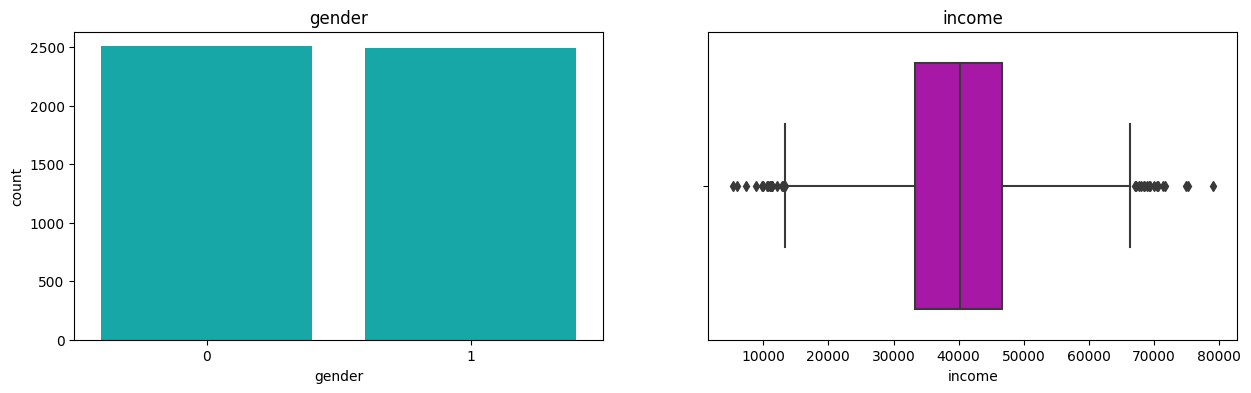

In [14]:
#Estadistica descriptiva para variables categoricas:
cols = ['gender', 'income']
fig, axes = plt.subplots(1,len(cols), figsize=(15,4))
sns.countplot(x=df['gender'], data=df, ax=axes[0], color='c')
sns.boxplot(x=df['income'], ax=axes[1],  color='m')

axes[0].set_title('gender')
axes[1].set_title('income')

plt.show()

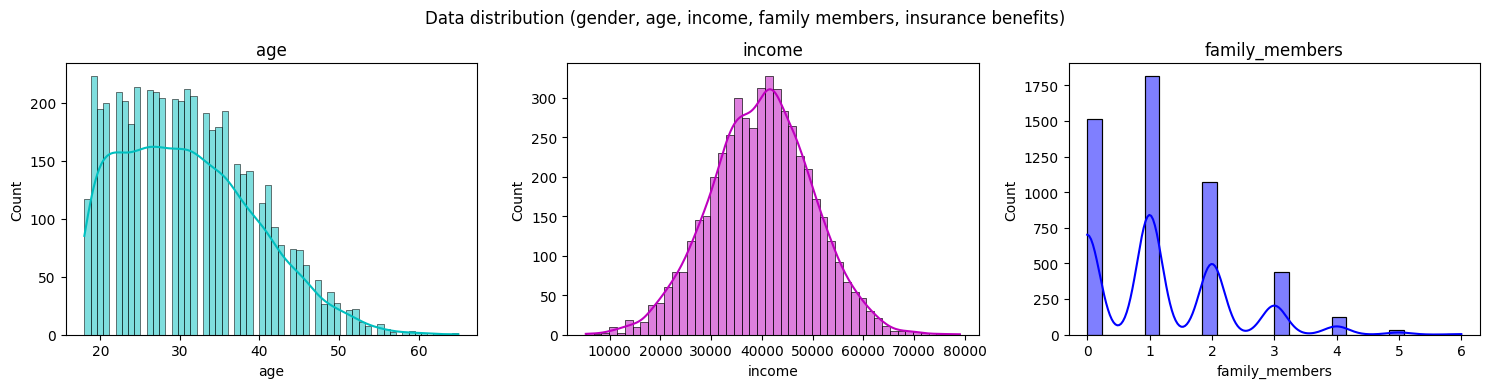

In [15]:
#estadistica descriptiva para variables numericas:
columns = ['age', 'income', 'family_members'] # ahora echa un vistazo a las estadísticas descriptivas de los datos.# ¿Se ve todo bien?
fig, axes = plt.subplots(1,len(columns), figsize=(15,4))


sns.histplot(df['age'], ax=axes[0], kde=True, bins=60, color='c')
sns.histplot(df['income'], ax=axes[1], kde=True, color='m')
sns.histplot(df['family_members'], ax=axes[2], kde=True, color='b')


fig.suptitle('Data distribution (gender, age, income, family members, insurance benefits)', y = 0.96)

axes[0].set_title('age')
axes[1].set_title('income')
axes[2].set_title('family_members')



plt.tight_layout()
plt.show()




## Análisis exploratorio de datos

Vamos a comprobar rápidamente si existen determinados grupos de clientes observando el gráfico de pares.

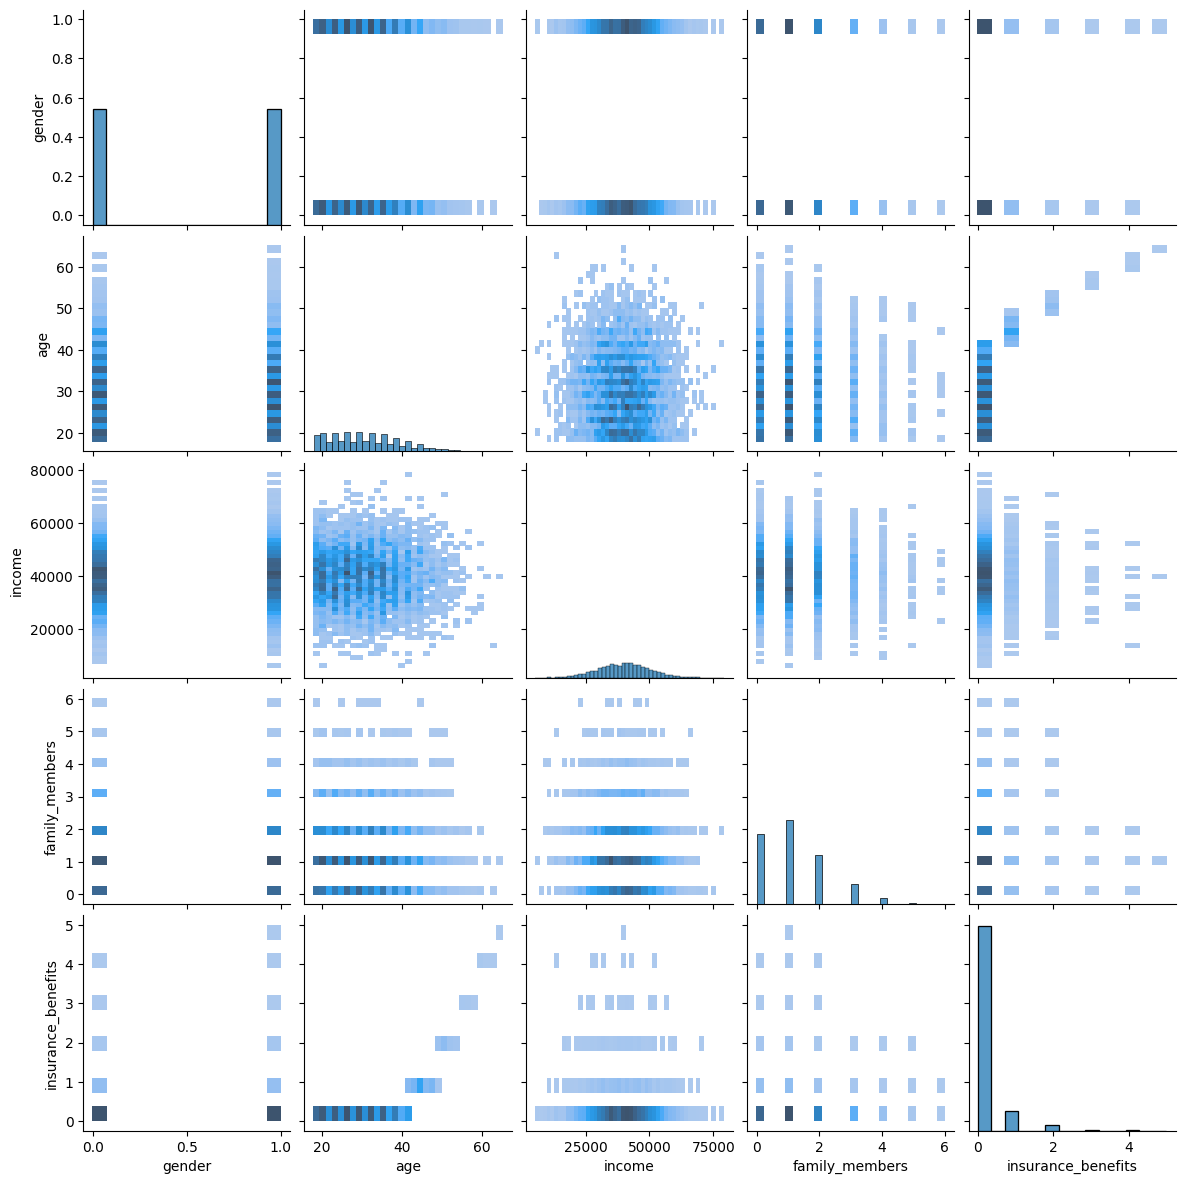

In [16]:
g = sns.pairplot(df, kind='hist')
g.fig.set_size_inches(12, 12)

De acuerdo, es un poco complicado detectar grupos obvios (clústeres) ya que es difícil combinar diversas variables simultáneamente (para analizar distribuciones multivariadas). Ahí es donde LA y ML pueden ser bastante útiles.

# Objetivo 1. Clientes similares

En el lenguaje de ML, es necesario desarrollar un procedimiento que devuelva los k vecinos más cercanos (objetos) para un objeto dado basándose en la distancia entre los objetos.
Es posible que quieras revisar las siguientes lecciones (capítulo -> lección)- Distancia entre vectores -> Distancia euclidiana
- Distancia entre vectores -> Distancia Manhattan

Para resolver la tarea, podemos probar diferentes métricas de distancia.

Escribe una función que devuelva los k vecinos más cercanos para un $n^{th}$ objeto basándose en una métrica de distancia especificada. A la hora de realizar esta tarea no debe tenerse en cuenta el número de prestaciones de seguro recibidas.
Puedes utilizar una implementación ya existente del algoritmo kNN de scikit-learn (consulta [el enlace](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html#sklearn.neighbors.NearestNeighbors)) o tu propia implementación.
Pruébalo para cuatro combinaciones de dos casos- Escalado
  - los datos no están escalados
  - los datos se escalan con el escalador [MaxAbsScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MaxAbsScaler.html)
- Métricas de distancia
  - Euclidiana
  - Manhattan

Responde a estas preguntas:- ¿El hecho de que los datos no estén escalados afecta al algoritmo kNN? Si es así, ¿cómo se manifiesta?- ¿Qué tan similares son los resultados al utilizar la métrica de distancia Manhattan (independientemente del escalado)?

In [17]:
feature_names = ['gender', 'age', 'income', 'family_members']

In [18]:
def get_knn(df, n, k, metric, scale=False):
    
    """
    Devuelve los k vecinos más cercanos

    :param df: DataFrame de pandas utilizado para encontrar objetos similares dentro del mismo lugar    
    :param n: número de objetos para los que se buscan los vecinos más cercanos    
    :param k: número de vecinos más cercanos a devolver
    :param métrica: nombre de la métrica de distancia    """

    if scale:
        scaler = MaxAbsScaler
        df_scaled = df[feature_names].copy()
        df_scaled[feature_names] = scaler.fit_transform(df[feature_names])
    else:
        df_scaled = df.copy()
    
    nbrs = NearestNeighbors(n_neighbors=k, metric=metric)
    nbrs.fit(df_scaled[feature_names])
    nbrs_distances, nbrs_indices = nbrs.kneighbors([df_scaled.iloc[n][feature_names]], k, return_distance=True)
    
    df_res = pd.concat([
        df.iloc[nbrs_indices[0]], 
        pd.DataFrame(nbrs_distances.T, index=nbrs_indices[0], columns=['distance'])
        ], axis=1)
    
    return df_res # <tu código aquí> 


Escalar datos.

In [19]:
feature_names = ['gender', 'age', 'income', 'family_members']

transformer_mas = sklearn.preprocessing.MaxAbsScaler().fit(df[feature_names].to_numpy())

df_scaled = df.copy()
df_scaled.loc[:, feature_names] = transformer_mas.transform(df[feature_names].to_numpy())

In [20]:
df_scaled.sample(5)

,gender,age,income,family_members,insurance_benefits
4689,0.0,0.630769,0.505063,0.000000,0
4309,1.0,0.507692,0.569620,0.000000,0
3464,0.0,0.676923,0.591139,0.166667,1
225,0.0,0.553846,0.570886,0.166667,0
2747,1.0,0.476923,0.500000,0.000000,0


Ahora, vamos a obtener registros similares para uno determinado, para cada combinación

In [21]:
df_euclidean_scaled = get_knn(df, n=0, k=5, metric='euclidean')
print(df_euclidean_scaled)

      gender  age   income  family_members  insurance_benefits  distance
0          1   41  49600.0               1                   0  0.000000
2022       1   41  49600.0               0                   0  1.000000
1225       0   42  49600.0               0                   1  1.732051
4031       1   44  49600.0               2                   1  3.162278
3424       0   38  49600.0               0                   0  3.316625


In [22]:
df_euclidean = get_knn(df, n=0, k=5, metric='euclidean', scale=False)
print(df_euclidean)

      gender  age   income  family_members  insurance_benefits  distance
0          1   41  49600.0               1                   0  0.000000
2022       1   41  49600.0               0                   0  1.000000
1225       0   42  49600.0               0                   1  1.732051
4031       1   44  49600.0               2                   1  3.162278
3424       0   38  49600.0               0                   0  3.316625


In [23]:
df_manhattan_scaled = get_knn(df, n=0, k=5, metric='manhattan')
print(df_manhattan_scaled)

      gender  age   income  family_members  insurance_benefits  distance
0          1   41  49600.0               1                   0       0.0
2022       1   41  49600.0               0                   0       1.0
1225       0   42  49600.0               0                   1       3.0
4031       1   44  49600.0               2                   1       4.0
3424       0   38  49600.0               0                   0       5.0


In [24]:
df_manhattan = get_knn(df, n=0, k=5, metric='manhattan', scale=False)
print(df_manhattan)

      gender  age   income  family_members  insurance_benefits  distance
0          1   41  49600.0               1                   0       0.0
2022       1   41  49600.0               0                   0       1.0
1225       0   42  49600.0               0                   1       3.0
4031       1   44  49600.0               2                   1       4.0
3424       0   38  49600.0               0                   0       5.0


Respuestas a las preguntas

**¿El hecho de que los datos no estén escalados afecta al algoritmo kNN? Si es así, ¿cómo se manifiesta?** 

Sí afecta, tanto la metrica Euclideana como la Manhattan son sensibles a la escala de las variables, las caracteristicas con mayores órdenes de magnitud podrian dominar nen los cálculos de distancia, o sesgar los datos, lo cual resulta en una baja presición en la predicción de los datos más cercanos. En este caso no hubo diferencias 

**¿Qué tan similares son los resultados al utilizar la métrica de distancia Manhattan (independientemente del escalado)?** 

La métrica Manhattan, a diferencia de la Euclidiana, considera la distancia absoluta entre los puntos en cada dimensión lo cual da datos un poco más robustos, sobre todo si las magnitudes no son muy distintas. 

# Objetivo 2. ¿Es probable que el cliente reciba una prestación del seguro?

En términos de machine learning podemos considerarlo como una tarea de clasificación binaria.

Con el valor de `insurance_benefits` superior a cero como objetivo, evalúa si el enfoque de clasificación kNN puede funcionar mejor que el modelo dummy.
Instrucciones:
- Construye un clasificador basado en KNN y mide su calidad con la métrica F1 para k=1...10 tanto para los datos originales como para los escalados. Sería interesante observar cómo k puede influir en la métrica de evaluación y si el escalado de los datos provoca alguna diferencia. Puedes utilizar una implementación ya existente del algoritmo de clasificación kNN de scikit-learn (consulta [el enlace](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)) o tu propia implementación.- Construye un modelo dummy que, en este caso, es simplemente un modelo aleatorio. Debería devolver "1" con cierta probabilidad. Probemos el modelo con cuatro valores de probabilidad: 0, la probabilidad de pagar cualquier prestación del seguro, 0.5, 1.
La probabilidad de pagar cualquier prestación del seguro puede definirse como
$$
P\{\text{prestación de seguro recibida}\}=\frac{\text{número de clientes que han recibido alguna prestación de seguro}}{\text{número total de clientes}}.
$$

Divide todos los datos correspondientes a las etapas de entrenamiento/prueba respetando la proporción 70:30.

In [25]:
# сalcula el objetivo
df['insurance_benefits_received'] = (df['insurance_benefits'] > 0).astype(int) #<tu código aquí>
df_scaled['insurance_benefits_received'] = (df_scaled['insurance_benefits'] > 0).astype(int)

0    4436
1     423
2     115
3      18
4       7
5       1
Name: insurance_benefits, dtype: int64
0    4436
1     564
Name: insurance_benefits_received, dtype: int64


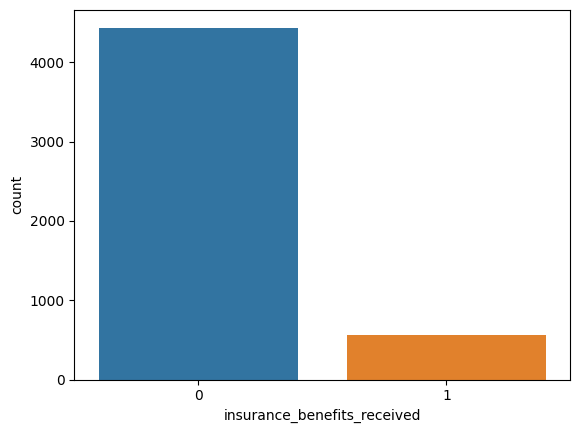

In [26]:
# comprueba el desequilibrio de clases con value_counts()
print(df['insurance_benefits'].value_counts()) # este es el total de usuarios y su respectiva cantidad de beneficios 
print(df['insurance_benefits_received'].value_counts()) #este el la cantidad de usuarios sin beneficios (0) vs usuarios con al menos un beneficio (1) 
# <tu código aquí>
sns.countplot(x=df['insurance_benefits_received'], data=df)
plt.show()

In [27]:
X = df[['gender', 'age', 'income', 'family_members']] 
y = df['insurance_benefits_received']
X_scaled = df_scaled[['gender', 'age', 'income', 'family_members']]
y_scaled = df_scaled['insurance_benefits_received']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1234)
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X, y, test_size=0.30, random_state=1234)
# Código para dividir los datos en proporción 70:30

In [29]:
def eval_classifier(y_true, y_pred):
    
    f1_score = sklearn.metrics.f1_score(y_true, y_pred)
    print(f'F1: {f1_score:.2f}')
# si tienes algún problema con la siguiente línea, reinicia el kernel y ejecuta el cuaderno de nuevo    
    cm = sklearn.metrics.confusion_matrix(y_true, y_pred, normalize='all')
    print('Matriz de confusión')
    print(cm)

In [30]:
# generar la salida de un modelo aleatorio

def rnd_model_predict(P, size, seed=42):

    rng = np.random.default_rng(seed=seed)
    return rng.binomial(n=1, p=P, size=size)

In [31]:
for k in range(1, 11):
    print(f"Evaluando KNN con k={k} (sin escalar):")
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    eval_classifier(y_test, y_pred)

    print(f"Evaluando KNN con k={k} (escalado):")
    knn.fit(X_train_scaled, y_train)
    y_pred_scaled = knn.predict(X_test_scaled)
    eval_classifier(y_test, y_pred_scaled)

Evaluando KNN con k=1 (sin escalar):
F1: 0.63
Matriz de confusión
[[0.85933333 0.02533333]
 [0.05066667 0.06466667]]
Evaluando KNN con k=1 (escalado):
F1: 0.63
Matriz de confusión
[[0.85933333 0.02533333]
 [0.05066667 0.06466667]]
Evaluando KNN con k=2 (sin escalar):
F1: 0.38
Matriz de confusión
[[0.87666667 0.008     ]
 [0.08666667 0.02866667]]
Evaluando KNN con k=2 (escalado):
F1: 0.38
Matriz de confusión
[[0.87666667 0.008     ]
 [0.08666667 0.02866667]]
Evaluando KNN con k=3 (sin escalar):
F1: 0.41
Matriz de confusión
[[0.87333333 0.01133333]
 [0.08266667 0.03266667]]
Evaluando KNN con k=3 (escalado):
F1: 0.41
Matriz de confusión
[[0.87333333 0.01133333]
 [0.08266667 0.03266667]]
Evaluando KNN con k=4 (sin escalar):
F1: 0.21
Matriz de confusión
[[0.882      0.00266667]
 [0.10133333 0.014     ]]
Evaluando KNN con k=4 (escalado):
F1: 0.21
Matriz de confusión
[[0.882      0.00266667]
 [0.10133333 0.014     ]]
Evaluando KNN con k=5 (sin escalar):
F1: 0.21
Matriz de confusión
[[0.879333

In [32]:
prob_pagar = df['insurance_benefits_received'].sum() / len(df)

In [33]:
for P in [0, prob_pagar, 0.5, 1]:

    print(f'La probabilidad: {P:.2f}')
    y_pred_rnd = rnd_model_predict(P, len(y_test)) 
        
    eval_classifier(y_test, y_pred_rnd)# <tu código aquí>
    
    print()

La probabilidad: 0.00
F1: 0.00
Matriz de confusión
[[0.88466667 0.        ]
 [0.11533333 0.        ]]

La probabilidad: 0.11
F1: 0.13
Matriz de confusión
[[0.782      0.10266667]
 [0.10066667 0.01466667]]

La probabilidad: 0.50
F1: 0.20
Matriz de confusión
[[0.45133333 0.43333333]
 [0.054      0.06133333]]

La probabilidad: 1.00
F1: 0.21
Matriz de confusión
[[0.         0.88466667]
 [0.         0.11533333]]



Divide todos los datos correspondientes a las etapas de entrenamiento/prueba respetando la proporción 70:30. Utiliza la métrica RECM para evaluar el modelo.

In [34]:
class MyLinearRegression:
    
    def __init__(self):
        
        self.weights = None
    
    def fit(self, X, y):
        
        # añadir las unidades
        X2 = np.append(np.ones([len(X), 1]), X, axis=1)
        self.weights = np.linalg.inv(X2.T.dot(X2)).dot(X2.T).dot(y)# <tu código aquí>

    def predict(self, X):
        
        # añadir las unidades
        X2 = np.append(np.ones([len(X), 1]), X, axis=1)# <tu código aquí>
        y_pred = X2.dot(self.weights)# <tu código aquí>
        
        return y_pred

In [35]:
def eval_regressor(y_true, y_pred):
    
    rmse = math.sqrt(sklearn.metrics.mean_squared_error(y_true, y_pred))
    print(f'RMSE: {rmse:.2f}')
    
    r2_score = math.sqrt(sklearn.metrics.r2_score(y_true, y_pred))
    print(f'R2: {r2_score:.2f}')    

In [36]:
X = df[['age', 'gender', 'income', 'family_members']].to_numpy()
y = df['insurance_benefits'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)

lr = MyLinearRegression()

lr.fit(X_train, y_train)
print(lr.weights)

y_test_pred = lr.predict(X_test)
eval_regressor(y_test, y_test_pred)

[-9.43539012e-01  3.57495491e-02  1.64272726e-02 -2.60743659e-07
 -1.16902127e-02]
RMSE: 0.34
R2: 0.66


# Objetivo 3. Ofuscar datos para proteccion de identidad

Lo mejor es ofuscar los datos multiplicando las características numéricas (recuerda que se pueden ver como la matriz $X$) por una matriz invertible $P$. 

$$
X' = X \times P
$$

Trata de hacerlo y comprueba cómo quedarán los valores de las características después de la transformación. Por cierto, la propiedad de invertibilidad es importante aquí, así que asegúrate de que $P$ sea realmente invertible.

Puedes revisar la lección 'Matrices y operaciones matriciales -> Multiplicación de matrices' para recordar la regla de multiplicación de matrices y su implementación con NumPy.

In [37]:
personal_info_column_list = ['gender', 'age', 'income', 'family_members']
df_pn = df[personal_info_column_list]

In [38]:
X = df_pn.to_numpy()

Generar una matriz aleatoria $P$.

In [39]:
rng = np.random.default_rng(seed=42)
P = rng.random(size=(X.shape[1], X.shape[1]))

Comprobar que la matriz P sea invertible

In [40]:
det_P =np.linalg.det(P)

In [41]:
print(f"Determinante de P: {det_P:.4f}")
if det_P == 0:
    print("La Matriz de P no es invertible")
else:
    print("La Matriz de P es invertible")

Determinante de P: 0.2434
La Matriz de P es invertible


¿Puedes adivinar la edad o los ingresos de los clientes después de la transformación?

In [42]:
X_prime = X.dot(P)


¿Puedes recuperar los datos originales de $X'$ si conoces $P$? Intenta comprobarlo a través de los cálculos moviendo $P$ del lado derecho de la fórmula anterior al izquierdo. En este caso las reglas de la multiplicación matricial son realmente útiles

In [43]:
P_inv = np.linalg.inv(P)
X_recovered = X_prime.dot(P_inv)

Muestra los tres casos para algunos clientes- Datos originales
- El que está transformado- El que está invertido (recuperado)

In [44]:
print("\nDatos originales, transformados y recuperados:")
for i in range(5):  # Mostrar los primeros 5 ejemplos
    print(f"\nCliente {i + 1}:")
    print(f"Original: {X[i]}")
    print(f"Transformado: {X_prime[i]}")
    print(f"Recuperado: {X_recovered[i]}")


Datos originales, transformados y recuperados:

Cliente 1:
Original: [1.00e+00 4.10e+01 4.96e+04 1.00e+00]
Transformado: [ 6359.71527314 22380.40467609 18424.09074184 46000.69669016]
Recuperado: [1.00e+00 4.10e+01 4.96e+04 1.00e+00]

Cliente 2:
Original: [0.0e+00 4.6e+01 3.8e+04 1.0e+00]
Transformado: [ 4873.29406479 17160.36702982 14125.78076133 35253.45577301]
Recuperado: [-4.47363596e-12  4.60000000e+01  3.80000000e+04  1.00000000e+00]

Cliente 3:
Original: [    0.    29. 21000.     0.]
Transformado: [ 2693.11742928  9486.397744    7808.83156024 19484.86063067]
Recuperado: [-2.51586878e-12  2.90000000e+01  2.10000000e+04  9.52452315e-13]

Cliente 4:
Original: [0.00e+00 2.10e+01 4.17e+04 2.00e+00]
Transformado: [ 5345.60393712 18803.22720286 15479.14837264 38663.06186284]
Recuperado: [-4.84498208e-12  2.10000000e+01  4.17000000e+04  2.00000000e+00]

Cliente 5:
Original: [1.00e+00 2.80e+01 2.61e+04 0.00e+00]
Transformado: [ 3347.17673462 11782.82928336  9699.99894205 24211.27337753]


Seguramente puedes ver que algunos valores no son exactamente iguales a los de los datos originales. ¿Cuál podría ser la razón de ello?

Al ofuscar los datos estos pierden precision con respecto a los originales por efecto de redondeo o limitaciones numericas.

## Prueba de regresión lineal con ofuscación de datos

Ahora, probemos que la regresión lineal pueda funcionar, en términos computacionales, con la transformación de ofuscación elegida.
El siguiente procedimiento ejecuta la regresión lineal opcionalmente con la ofuscación. Se implementa la regresión lineal de scikit-learn.
Se ejecuta la regresión lineal para los datos originales y los ofuscados, compara los valores predichos y los valores de las métricas RMSE y $R^2$. 

In [46]:
class RegresionLinealOfuscada:
    def __init__(self, X, y):
        self.X = X
        self.y = y
        self.model = LinearRegression()
        
    def matrix_P(self, p):
        while True:
            P = np.random.randn(p, p)
            if np.linalg.det(P) != 0:  # Verifica que la matriz sea invertible
                return P
            
    def fit_model(self, X_train, y_train):
        self.model.fit(X_train, y_train)
        
    def predict (self, X_test):
        return self.model.predict(X_test)
    
    def calculate_rmse (self, y_true, y_pred):
        return np.sqrt(mean_squared_error(y_true, y_pred))
    
    def calculate_r2 (self, y_true, y_pred):
        return r2_score(y_true, y_pred)
    
    def execute(self):
        P = self.matrix_P(self.X.shape[1])
        
        X_P = np.dot(self.X, P)
        
        self.fit_model(self.X, self.y)
        y_pred_original = self.predict(self.X)
        
        self.fit_model(X_P, self.y)
        y_pred_ofuscado = self.predict(X_P)
        
        rmse_original = self.calculate_rmse(self.y, y_pred_original)
        r2_original = self.calculate_r2(self.y, y_pred_original)
        
        rmse_ofuscado = self.calculate_rmse(self.y, y_pred_ofuscado)
        r2_ofuscado = self.calculate_r2(self.y, y_pred_ofuscado)
        
        print("RMSE con datos originales:", rmse_original)
        print("R^2 con datos originales:", r2_original)
        print("RMSE con datos ofuscados:", rmse_ofuscado)
        print("R^2 con datos ofuscados:", r2_ofuscado)
        
        return rmse_original, r2_original, rmse_ofuscado, r2_ofuscado
    
np.random.seed(1234)
X = np.random.randn(100, 5)  
y = np.dot(X, np.array([1, 2, 3, 4, 5])) + 10  

# Ejecutar el procedimiento
regression = RegresionLinealOfuscada(X, y)
regression.execute()
    

RMSE con datos originales: 5.309048892555685e-15
R^2 con datos originales: 1.0
RMSE con datos ofuscados: 1.9243222521497977e-12
R^2 con datos ofuscados: 1.0


(5.309048892555685e-15, 1.0, 1.9243222521497977e-12, 1.0)

Interpretación:

En ambos casos no se encontraron diferencias entre el R2 y RMSE debido a que este método no cambia la relacion subyacente de los datos, es decir, los cambios que realiza en los datos no modifica la tendencia general lo cual no afecta el rendimiento de R2 o RMSE ni la capacidad predictiva del modelo.

Tanto R2 como RMSE son métricas poco sensibles a la ofuscación sobre todo si ambos conjuntos tienen la misma dispersión de errores. 

# Conclusiones

El método k-NN es eficiente para tareas de clasificación o predicción combinado con el escalado de los datos para las métricas de distancia como la Euclideana y Manhattan las cuales son sensibles al escalado.

Un modelo predictivo funciona mejor que modelo dummy, ya que este ultimo unicamente predice la clase más frecuente. Comparativamente el modelo predictivo aprende de las caracteristicas y es posible obtener predicciones que refleja la relación que tienen las columnas. 

La regresión lineal es un modelo que predice efectivamente si la relacion entre las caracteristicas y el objetivo es cercana al lineal. Estos resultados pueden ser evaluados mediante $R^{2}$ y $RMSE$

La ofuscación de los datos no impacta en desempeño del modelo, como se demuestra en la tarea 4, esto es muy importante ya que permite proteger la información sensible mientras mantiene la relacion que existe entre las columnas del DataFrame y al mismo tiempo permite obtener predicciones 